In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from scipy.stats import skew
import seaborn as sns

/Users/alishaalex/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/Users/alishaalex/Desktop/Housepriceprediction/Bengaluru_House_Data.csv')
print(data.shape)
data.head()
data_temp = data.copy()

(13320, 9)


Here, I have droppped the columns location, avalilability,balcony and society as in my analysis i think location size total squareft and bath plays major role while looking for A property and rest depend on these features.

In [3]:
data = data.drop(['area_type','availability','balcony','society'], axis=1)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
#looking for missing values
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [6]:
dta = data.copy()

In [7]:
def check_skewness(column):
    # Remove NaN values for accurate calculation
    clean_data = column.dropna() #for the sake of checking skweness
    
    # Calculate skewness
    skewness = skew(clean_data)
    
    if skewness > 0:
        return "Positively skewed"
    elif skewness < 0:
        return "Negatively skewed"
    else:
        return "Symmetric (not skewed)"

In [8]:
skewness_result = check_skewness(dta['bath'])
print("Skewness result:", skewness_result)

Skewness result: Positively skewed


Here column bath has 73 null values and if i drop all the rows i might loose 73 rows so instead of dropping i would go with filling it median values.I chose median since i have a concern with outliers and i have already found in previously that the columns id positively skewed. So its better to go with median.

In [9]:
data['bath'].median()

2.0

In [10]:
#replacing mising values with median in bath
data['bath'] = data['bath'].fillna(data['bath'].median())

In [11]:
data['bath'].isnull().sum()

0

In [12]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

now iam going to simply drop rest of the null values

In [13]:
data = data.dropna()

In [14]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
data.shape

(13303, 5)

Consider the column "size" ,

In [16]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here, 2 bhk is same as 2 bedroom or 3 bhk is same as 3 bedroom

In [17]:
data['BHK'] = data['size'].apply(lambda x: x.split(' ')[0])

In [18]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13303 non-null  object 
 3   bath        13303 non-null  float64
 4   price       13303 non-null  float64
 5   BHK         13303 non-null  object 
dtypes: float64(2), object(4)
memory usage: 727.5+ KB


In [20]:
data['BHK']=data['BHK'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13303 non-null  object 
 3   bath        13303 non-null  float64
 4   price       13303 non-null  float64
 5   BHK         13303 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 727.5+ KB


In [21]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Now consider the the column "total_sqft"

In [22]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here there are numebers and ranges and is of type object. so if it is a range then iam goin to take average and if there is some other form which may be possible, iam justr going to ignore it.

In [23]:
def convert_rangetofloat(val):
    tok = val.split('-')
    if len(tok) == 2:
        return(float(tok[0])+float(tok[1]))/2
    try:
        return float(val)
    except:
        return None

In [24]:
convert_rangetofloat('6 - 6')

6.0

In [25]:
convert_rangetofloat('10')

10.0

In [26]:
convert_rangetofloat('50 meter')

In [27]:
data_t = data.copy()


In [28]:
data_t['total_sqft'] = data_t['total_sqft'].apply(convert_rangetofloat)


In [29]:
data_t.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [30]:
data_t.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


now lets check if all the values are float

In [31]:
def is_float(val):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
data_t[~data_t['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
data_t['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13303 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13257 non-null  float64
dtypes: float64(1)
memory usage: 207.9 KB


In [34]:
data_ft = data_t.copy()
data_ft.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [35]:
data_ft['price_per_sqft'] = data_ft['price']*100000/data_ft['total_sqft']
data_ft.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
data_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13303 non-null  object 
 1   size            13303 non-null  object 
 2   total_sqft      13257 non-null  float64
 3   bath            13303 non-null  float64
 4   price           13303 non-null  float64
 5   BHK             13303 non-null  int64  
 6   price_per_sqft  13257 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 831.4+ KB


In [37]:
data_ft.location = data_ft.location.apply(lambda x: x.strip())

In [82]:
location_stats = data_ft.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [83]:
location_stats.values.sum()

13303

In [84]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [86]:
len(data_ft.location.unique())

1293

In [87]:
data_ft.location = data_ft.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data_ft.location.unique())

242

## Detecting & removing outliers

In [88]:
data_ft.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


we know that if total sqft is 400 with bhk 4 then 100.0 per bedroom which is not usual so we have threshold of 300

In [89]:
data_ft[data_ft.total_sqft/data_ft.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [90]:
#removing theses datapoints
data_f = data_ft[~(data_ft.total_sqft/data_ft.BHK<300)]
data_f.shape

(12559, 7)

In [91]:
data_f.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12513.000000,12559.000000,12559.000000,12559.000000,12513.000000
mean,1593.745883,2.562226,111.522978,2.653316,6307.441644
std,1261.402072,1.083146,151.991947,0.982671,4160.931610
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5295.007564
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [92]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data_out = remove_pps_outliers(data_f)
data_out.shape

(10286, 7)

now consider 'bath' faeture

In [93]:
data_out['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

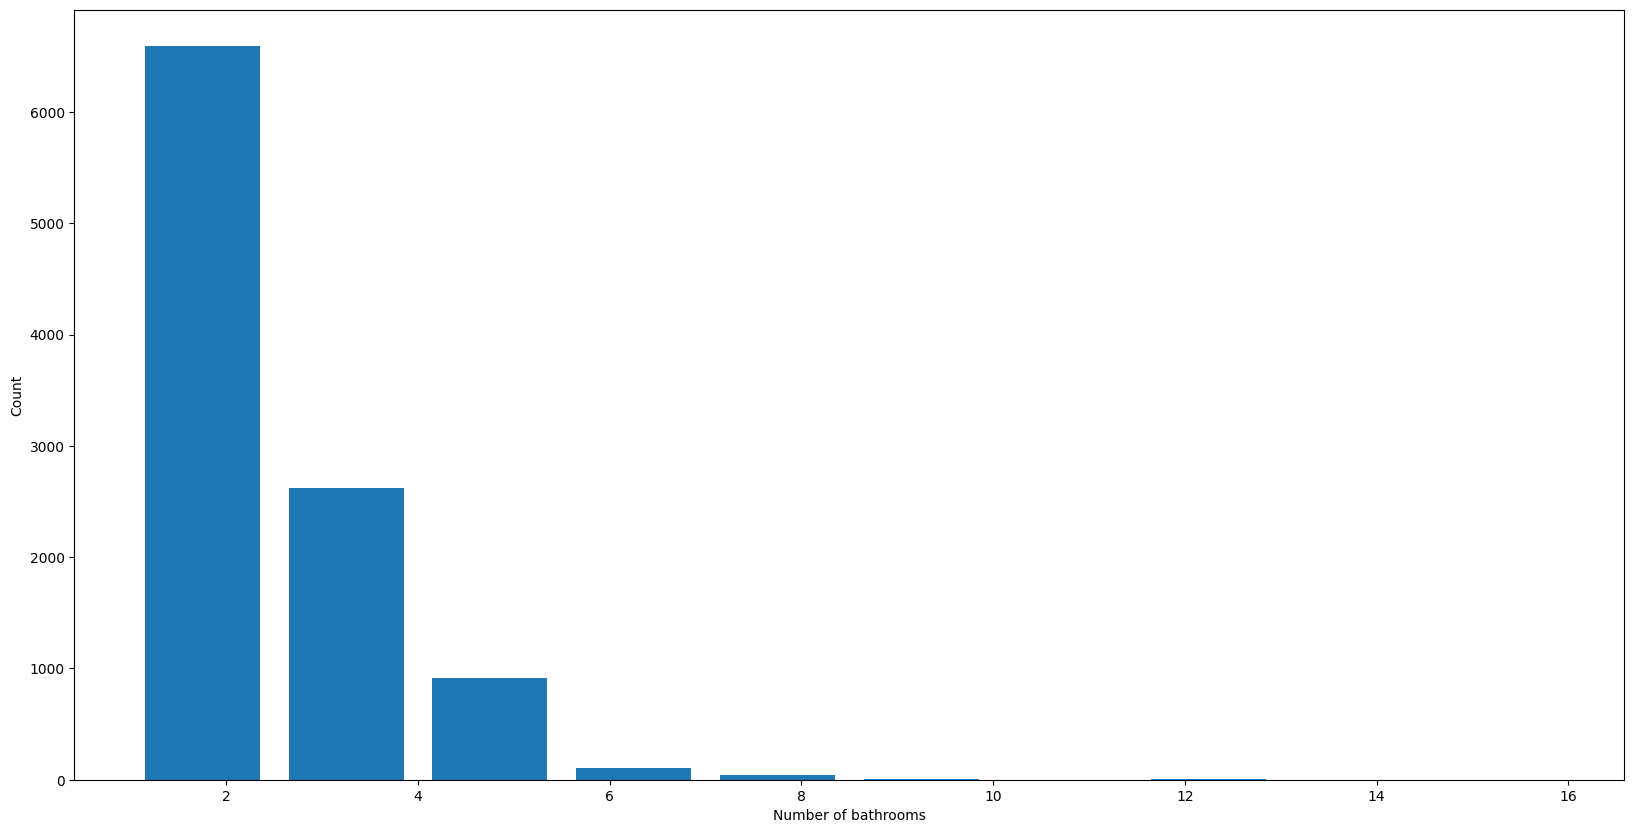

In [94]:
plt.hist(data_out.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Majority of the properties have 2 baths  and it may go up 14 baths. Now consider a 2bhk it can have 2 bathrooms and atmost 3 bathrooms and it is not ordinary to have 4 bathrooms in a 2bhk. so if tehre is any  X BHK property with number of bathrooms greater than or equal to X+2 it is not usual.so they can be removed

In [95]:
data_out[data_out['bath'] >= data_out['BHK']+1]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
16,1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5952.380952
25,1st Phase JP Nagar,4 BHK,2615.0,5.0,222.0,4,8489.483748
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
...,...,...,...,...,...,...,...
10219,other,2 BHK,600.0,3.0,72.0,2,12000.000000
10237,other,4 BHK,2710.0,5.0,142.0,4,5239.852399
10247,other,4 BHK,6652.0,6.0,660.0,4,9921.828022
10254,other,4 Bedroom,6688.0,6.0,700.0,4,10466.507177


In [96]:
df = data_out[data_out['bath'] >= data_out['BHK']+1]

In [97]:
df.shape

(582, 7)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 10 to 10285
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        582 non-null    object 
 1   size            582 non-null    object 
 2   total_sqft      582 non-null    float64
 3   bath            582 non-null    float64
 4   price           582 non-null    float64
 5   BHK             582 non-null    int64  
 6   price_per_sqft  582 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.4+ KB


dropping size,price_per_squareft as there are not much of a use

In [99]:
df = df.drop(['size','price_per_sqft'],axis = 1)

In [100]:
df.head()

,location,total_sqft,bath,price,BHK
10,1st Phase JP Nagar,2065.0,4.0,210.0,3
16,1st Phase JP Nagar,840.0,2.0,50.0,1
25,1st Phase JP Nagar,2615.0,5.0,222.0,4
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 10 to 10285
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    582 non-null    object 
 1   total_sqft  582 non-null    float64
 2   bath        582 non-null    float64
 3   price       582 non-null    float64
 4   BHK         582 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 27.3+ KB


location is of non numerical hence require to do 1 hot encoding.

In [102]:
df_dummies = pd.get_dummies(df['location'])

In [103]:
df_dummies = df_dummies.astype(int)
df_dummies

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambedkar Nagar,Amruthahalli,Ananth Nagar,...,Thanisandra,Thigalarapalya,Ulsoor,Vidyaranyapura,Vijayanagar,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
df_main = pd.concat([df,df_dummies], axis='columns')

In [105]:
df_main.head()

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Thanisandra,Thigalarapalya,Ulsoor,Vidyaranyapura,Vijayanagar,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1st Phase JP Nagar,840.0,2.0,50.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1st Phase JP Nagar,2615.0,5.0,222.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_main = df_main.drop('location', axis = 1)
df_main.head()

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,Abbigere,...,Thanisandra,Thigalarapalya,Ulsoor,Vidyaranyapura,Vijayanagar,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
10,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,840.0,2.0,50.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,2615.0,5.0,222.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,3000.0,8.0,451.0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2400.0,8.0,450.0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_main.shape

(582, 119)